In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install jpype1

In [ ]:
import re
import nltk
nltk.download("stopwords")  #downloading stopwords
nltk.download('punkt')
nltk.download('wordnet')
import nltk as nlp
import string
from nltk import word_tokenize,sent_tokenize
from sklearn import preprocessing
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java

import seaborn as sns

from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
import urllib.request
import os
import tempfile
import sys
import fileinput
import logging
import jpype

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MachineLearning/onderhoca/7allV03.csv")
df

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...
...,...,...
4895,teknoloji,iphone lara geri dönüyor ios 6 sürümüyle tele...
4896,teknoloji,muslukta devrim sadece elimizi yıkadığımız mu...
4897,teknoloji,halka iyi anlatılmalı bilgi_teknolojileri ile...
4898,teknoloji,çöpe gidiyorlar apple 775 bin uygulamayla app...


In [ ]:
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(df.category)

y

array([4, 4, 4, ..., 6, 6, 6])

In [ ]:
def tokenizasyon(text):
    return word_tokenize(text)
def lemmatizer(text):
    lemma_words = []
    ZEMBEREK_PATH2 = r'/content/drive/MyDrive/MachineLearning/onderhoca/zemberek-full.jar'
    if jpype.isJVMStarted() is False:
        startJVM(getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH2))
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    morphology = TurkishMorphology.createWithDefaults()
    for text in tokenizasyon(text):
        lemma_word = str(morphology.analyzeAndDisambiguate(str(text)).bestAnalysis()[0].getLemmas()[0])
        lemma_words.append(lemma_word)
    text = ' '.join(lemma_words)
    return text

def convert_lowercase(text):
    return text.lower()
def remove_punctuation(text):
    return ''.join(d for d in text if d not in string.punctuation)
def remove_stopwords(text):
    stopwords = []
    with open(r'/content/drive/MyDrive/MachineLearning/onderhoca/stopwords.txt', 'r',encoding='utf-8') as f:
        for word in f:
            word = word.split('\n')
            stopwords.append(word[0])
    clean_text = ' '.join(s for  s in text.split() if s not in stopwords)
    return clean_text
def remove_numbers(text):
    text = re.sub(r'\d', '', text)
    return text
def remove_less_than_2(text):
    text = ' '.join([w for w in text.split() if len(w)>2])
    return text
def remove_extra_space(text):
    ornek_text_strip = re.sub(' +', ' ', text)
    return ornek_text_strip.strip()

In [ ]:
print(jpype.java.lang.System.getProperty('java.class.path'))

In [ ]:
df['text'] = df['text'].apply(lemmatizer)
df['text'] = df['text'].apply(convert_lowercase)
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(remove_extra_space)
df['text'] = df['text'].apply(remove_numbers)
df['text'] = df['text'].apply(remove_less_than_2)

In [ ]:
texts = []
for text in df.text:
    texts.append(text)

In [ ]:
texts

In [ ]:
with open("/content/drive/MyDrive/MachineLearning/onderhoca/kelimeler.txt", 'w') as f:
    for s in texts:
        f.write(str(s) + '\n')

In [ ]:
# önişlenmiş verileri çağırıyorum
with open("/content/drive/MyDrive/MachineLearning/onderhoca/kelimeler.txt", 'r') as f:
    kelimeler = [line.rstrip('\n') for line in f]

kelimeler

In [ ]:
def istenmeyen_kelimeleri_cikar(metin_listesi, istenmeyen_kelimeler):
    temiz_metin = []

    for metin in metin_listesi:
        kelimeler = metin.split()
        temiz_kelimeler = [kelime for kelime in kelimeler if kelime.lower() not in istenmeyen_kelimeler]
        temiz_metin.append(' '.join(temiz_kelimeler))

    return temiz_metin

# Kullanım örneği:
istenmeyen_kelimeler = ["unk", "nda", "anka", "adal"]

temiz_metin = istenmeyen_kelimeleri_cikar(kelimeler, istenmeyen_kelimeler)
temiz_metin

In [ ]:
tek_dize_satirlar = '\n'.join(temiz_metin)

with open("/content/drive/MyDrive/MachineLearning/onderhoca/temiz_metin.txt", 'w') as f:
    f.write(tek_dize_satirlar)

In [ ]:
# önişlenmiş verileri çağırıyorum
with open("/content/drive/MyDrive/MachineLearning/onderhoca/temiz_metin.txt", 'r') as f:
    temiz_metin = [line.rstrip('\n') for line in f]

temiz_metin

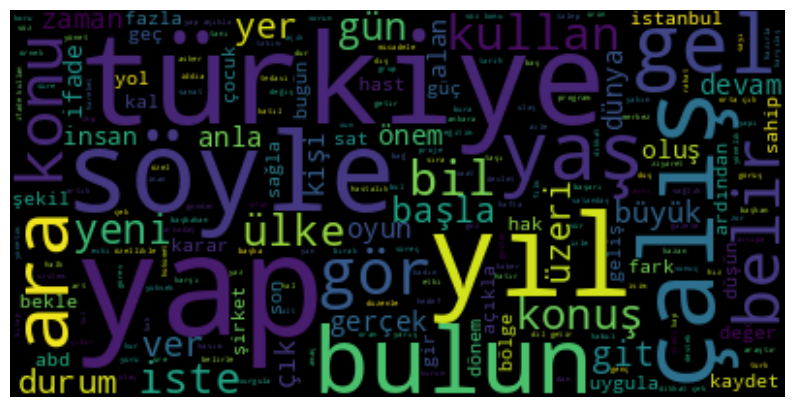

In [ ]:
text = ' '.join(temiz_metin)

wordcloud = WordCloud(stopwords=temiz_metin, background_color="black").generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

# **EĞİTİM VE TEST**

TFidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features=500 # "number" most common(used) words in reviews
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=5000)
X = tfidf.fit_transform(temiz_metin).toarray()

In [ ]:
X.shape

(4900, 5000)

In [ ]:
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02585107 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
y

array([4, 4, 4, ..., 6, 6, 6])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# **SINIFLANDIRMALAR**

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       131
           1       0.80      0.80      0.80       142
           2       0.83      0.89      0.86       139
           3       0.83      0.94      0.88       122
           4       0.86      0.70      0.77       158
           5       0.95      0.96      0.96       147
           6       0.84      0.86      0.85       141

    accuracy                           0.84       980
   macro avg       0.84      0.85      0.84       980
weighted avg       0.84      0.84      0.84       980

Knn Accuracy değeri: 84.28571428571429
Knn Precision değeri: 84.16366138025163
Knn Recall değeri: 84.58223298853044
Knn F1 Score değeri: 84.19098167591883


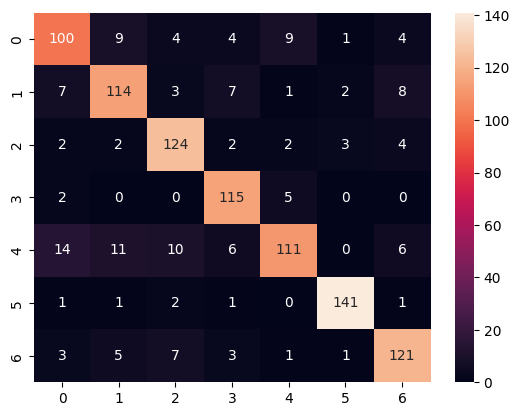

In [ ]:
#KNN
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print(classification_report(y_test,y_pred))

# Accuracy
knnDogruluk=accuracy_score(y_test,y_pred)
print("Knn Accuracy değeri:",knnDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Knn Precision değeri:",Precision.mean()*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Knn Recall değeri:", Recall.mean()*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("Knn F1 Score değeri:",F1_score.mean()*100)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

In [ ]:
#KNN
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi

warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanKNN = accuracy.mean()*100
print('Accuracy', accMeanKNN)


Accuracy 82.9591836734694


In [ ]:
knn_cv_r = [accMeanKNN,precision]

In [ ]:
#KNN
# k-fold sonucunu dosyaya kaydediyorum
import pickle
dosya = "/content/drive/MyDrive/MachineLearning/onderhoca/save/kfold_save/knn_cv"
pickle.dump( accMeanKNN , open(dosya,'wb'))
accMeanKNN = pickle.load(open(dosya,'rb'))

print( accMeanKNN )


82.98469387755102


In [ ]:
# knn modelinin sonucunun dosyaya kayıt edilmesi
"""
import pickle
dosya = "save/model_save/knn"
pickle.dump(knn, open(dosya,'wb'))
knnR = pickle.load(open(dosya,'rb'))

y_pred = knnR.predict(X_test)

print(classification_report(y_test,y_pred))

# Accuracy
knnDogruluk=accuracy_score(y_test,y_pred)
print("Knn Accuracy değeri:",knnDogruluk*100)
"""

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       131
           1       0.88      0.89      0.88       142
           2       0.90      0.94      0.92       139
           3       0.93      0.99      0.96       122
           4       0.89      0.86      0.88       158
           5       0.99      0.95      0.97       147
           6       0.89      0.90      0.90       141

    accuracy                           0.91       980
   macro avg       0.90      0.91      0.91       980
weighted avg       0.91      0.91      0.90       980

Logistik Regresyon doğruluk: 90.51020408163265
Precision değeri: 85.48387096774194
Recall değeri: 80.91603053435115
F1 Score değeri: 83.1372549019608


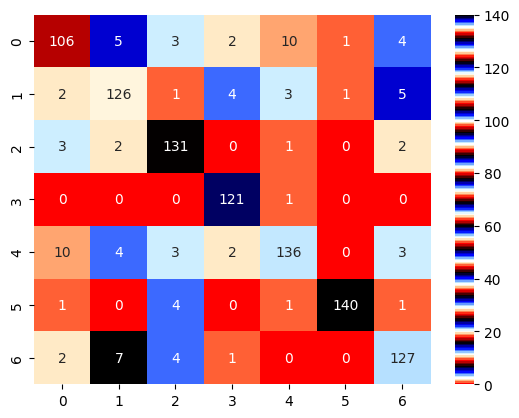

In [ ]:
#LogisticRegression
warnings.filterwarnings('ignore')

logr = LogisticRegression()
logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
logDogruluk=accuracy_score(y_test,y_pred)
print("Logistik Regresyon doğruluk:", logDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f",cmap='flag')
plt.show()

In [ ]:
#LogisticRegression
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanlogr = accuracy.mean()*100
print('Accuracy', accMeanlogr)


Accuracy 89.71938775510203


              precision    recall  f1-score   support

           0       0.63      0.60      0.61       131
           1       0.56      0.60      0.58       142
           2       0.76      0.81      0.78       139
           3       0.85      0.84      0.84       122
           4       0.68      0.61      0.64       158
           5       0.92      0.83      0.87       147
           6       0.63      0.71      0.67       141

    accuracy                           0.71       980
   macro avg       0.72      0.71      0.71       980
weighted avg       0.72      0.71      0.71       980

Decision Tree doğruluk: 71.12244897959184
Precision değeri: 62.903225806451616
Recall değeri: 59.541984732824424
F1 Score değeri: 61.17647058823529
MAE değeri: 0.8642857142857143
MSE değeri: 3.2438775510204083
RMSE değeri: 1.801076775437518


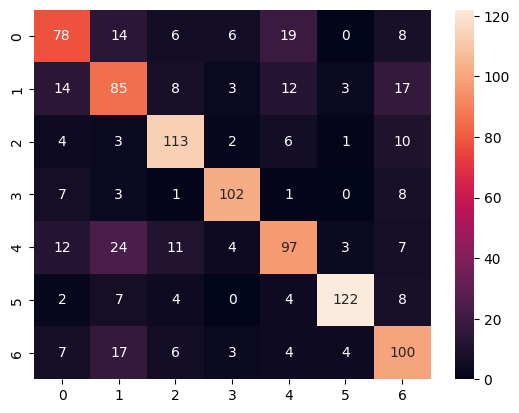

In [ ]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
dtDogruluk=accuracy_score(y_test,y_pred)
print("Decision Tree doğruluk:", dtDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
#DecisionTreeClassifier
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = dt, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanDT = accuracy.mean()*100
print('Accuracy', accMeanDT)

Accuracy 72.14285714285714


              precision    recall  f1-score   support

           0       0.83      0.88      0.86       131
           1       0.87      0.88      0.87       142
           2       0.94      0.93      0.93       139
           3       0.94      0.97      0.95       122
           4       0.90      0.87      0.89       158
           5       0.99      0.95      0.97       147
           6       0.90      0.91      0.90       141

    accuracy                           0.91       980
   macro avg       0.91      0.91      0.91       980
weighted avg       0.91      0.91      0.91       980

SVM doğruluk: 91.02040816326532
Precision değeri: 83.33333333333334
Recall değeri: 87.78625954198473
F1 Score değeri: 85.50185873605949
MAE değeri: 0.29285714285714287
MSE değeri: 1.1683673469387754
RMSE değeri: 1.0809104250301111


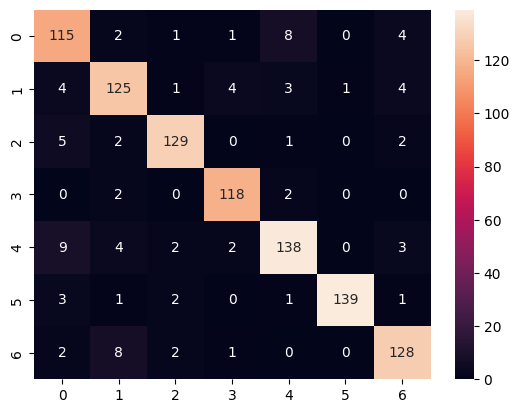

In [ ]:
#SVC
warnings.filterwarnings('ignore')

"""
svc için en iyi değerler
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
"""

dvm = SVC(probability=True)
dvm.fit(X_train,y_train)

y_pred=dvm.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
dvmDogruluk=accuracy_score(y_test,y_pred)
print("SVM doğruluk:", dvmDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#SVC
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = dvm, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanSVC = accuracy.mean()*100
print('Accuracy', accMeanSVC)


Accuracy 90.12755102040816


              precision    recall  f1-score   support

           0       0.77      0.62      0.69       131
           1       0.67      0.79      0.73       142
           2       0.79      0.79      0.79       139
           3       0.93      0.93      0.93       122
           4       0.71      0.82      0.76       158
           5       0.99      0.90      0.94       147
           6       0.84      0.80      0.82       141

    accuracy                           0.81       980
   macro avg       0.82      0.81      0.81       980
weighted avg       0.81      0.81      0.81       980

Gaussian NB doğruluk: 80.61224489795919
Precision değeri: 77.14285714285715
Recall değeri: 61.832061068702295
F1 Score değeri: 68.64406779661017
MAE değeri: 0.5918367346938775
MSE değeri: 2.216326530612245
RMSE değeri: 1.488733196584346


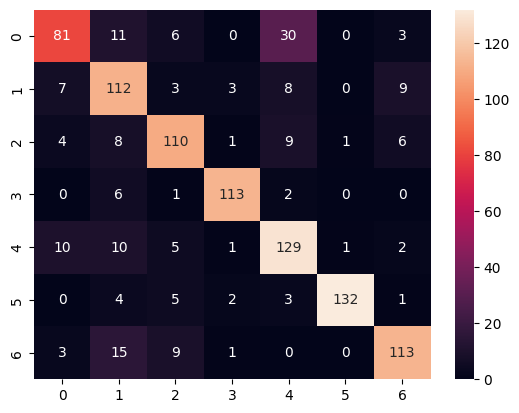

In [ ]:
#GaussianNB
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
gnbDogruluk=accuracy_score(y_test,y_pred)
print("Gaussian NB doğruluk:", gnbDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
#GaussianNB
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = gnb, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanGNB = accuracy.mean()*100
print('Accuracy', accMeanGNB)

Accuracy 80.17857142857142


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       131
           1       0.80      0.84      0.82       142
           2       0.86      0.92      0.89       139
           3       0.90      0.98      0.94       122
           4       0.87      0.81      0.84       158
           5       0.97      0.95      0.96       147
           6       0.87      0.83      0.85       141

    accuracy                           0.87       980
   macro avg       0.87      0.87      0.87       980
weighted avg       0.87      0.87      0.87       980

RandomForest doğruluk: 87.14285714285714
Precision değeri: 81.25
Recall değeri: 79.38931297709924
F1 Score değeri: 80.30888030888032
MAE değeri: 0.38979591836734695
MSE değeri: 1.4775510204081632
RMSE değeri: 1.2155455649247227


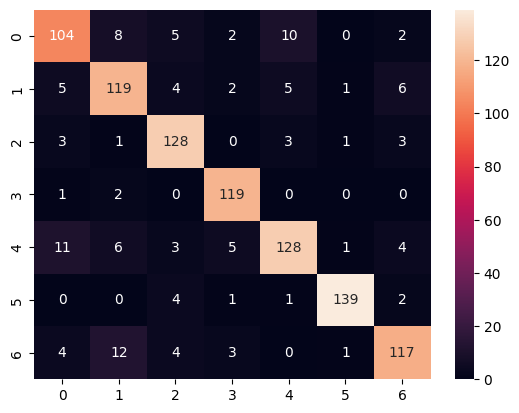

In [ ]:
#RandomForestClassifier
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
randomForestDogruluk=accuracy_score(y_test,y_pred)
print("RandomForest doğruluk:", randomForestDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()


In [ ]:
#RandomForestClassifier
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = rfc, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanRFC = accuracy.mean()*100
print('Accuracy', accMeanRFC)

Accuracy 87.24489795918367


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       131
           1       0.87      0.87      0.87       142
           2       0.93      0.93      0.93       139
           3       0.92      0.98      0.95       122
           4       0.89      0.84      0.86       158
           5       0.99      0.97      0.98       147
           6       0.91      0.91      0.91       141

    accuracy                           0.91       980
   macro avg       0.91      0.91      0.91       980
weighted avg       0.91      0.91      0.91       980

ANN doğruluk: 90.61224489795919
Precision değeri: 82.83582089552239
Recall değeri: 84.7328244274809
F1 Score değeri: 83.77358490566039
MAE değeri: 0.2897959183673469
MSE değeri: 1.1142857142857143
RMSE değeri: 1.0555973258234952


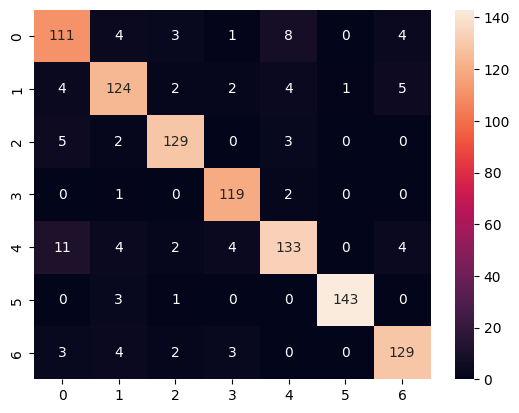

In [ ]:
#Yapay Sinir Ağları(Artificial Nerual Network)

from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()

mlpc.fit(X_train,y_train)

y_pred = mlpc.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
annDogruluk=accuracy_score(y_test,y_pred)
print("ANN doğruluk:", annDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
#ANN

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = mlpc, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanANN = accuracy.mean()*100
print('Accuracy', accMeanANN)

Accuracy 90.43367346938774


              precision    recall  f1-score   support

           0       0.58      0.56      0.57       131
           1       0.59      0.60      0.59       142
           2       0.77      0.83      0.80       139
           3       0.84      0.82      0.83       122
           4       0.66      0.65      0.65       158
           5       0.91      0.85      0.88       147
           6       0.65      0.70      0.68       141

    accuracy                           0.71       980
   macro avg       0.72      0.71      0.71       980
weighted avg       0.72      0.71      0.71       980

CART doğruluk: 71.3265306122449
Precision değeri: 58.4
Recall değeri: 55.72519083969466
F1 Score değeri: 57.03125
MAE değeri: 0.8683673469387755
MSE değeri: 3.303061224489796
RMSE değeri: 1.8174325914569145


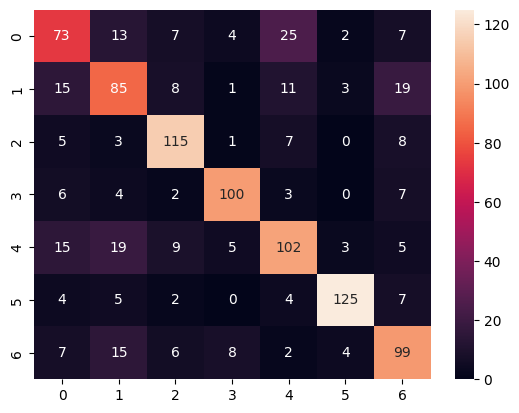

In [ ]:
# CART (Classification and Regression Tree)

from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)

y_pred = cart.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
cartDogruluk=accuracy_score(y_test,y_pred)
print("CART doğruluk:", cartDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()


In [ ]:
#CART

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = cart, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanCART = accuracy.mean()*100
print('Accuracy', accMeanCART)

Accuracy 71.27551020408164


              precision    recall  f1-score   support

           0       0.79      0.82      0.80       131
           1       0.80      0.85      0.82       142
           2       0.90      0.93      0.91       139
           3       0.92      0.93      0.93       122
           4       0.90      0.82      0.85       158
           5       0.97      0.90      0.93       147
           6       0.84      0.86      0.85       141

    accuracy                           0.87       980
   macro avg       0.87      0.87      0.87       980
weighted avg       0.87      0.87      0.87       980

GBM doğruluk: 87.04081632653062
Precision değeri: 78.67647058823529
Recall değeri: 81.67938931297711
F1 Score değeri: 80.1498127340824
MAE değeri: 0.41122448979591836
MSE değeri: 1.623469387755102
RMSE değeri: 1.2741543814448475


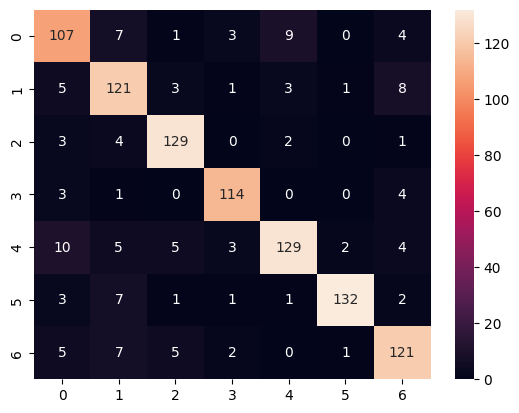

In [ ]:
# Gradient Boosting Machine(GBM)

from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
gbmDogruluk=accuracy_score(y_test,y_pred)
print("GBM doğruluk:", gbmDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
#GBM

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = gbm, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanGBM = accuracy.mean()*100
print('Accuracy', accMeanGBM)


Accuracy 86.60714285714285


              precision    recall  f1-score   support

           0       0.84      0.87      0.85       131
           1       0.82      0.87      0.85       142
           2       0.88      0.94      0.91       139
           3       0.92      0.95      0.94       122
           4       0.91      0.80      0.85       158
           5       0.96      0.91      0.93       147
           6       0.87      0.87      0.87       141

    accuracy                           0.88       980
   macro avg       0.88      0.89      0.88       980
weighted avg       0.89      0.88      0.88       980

xgboost doğruluk: 88.36734693877551
Precision değeri: 83.82352941176471
Recall değeri: 87.02290076335878
F1 Score değeri: 85.39325842696628
MAE değeri: 0.3469387755102041
MSE değeri: 1.2938775510204081
RMSE değeri: 1.1374873849939646


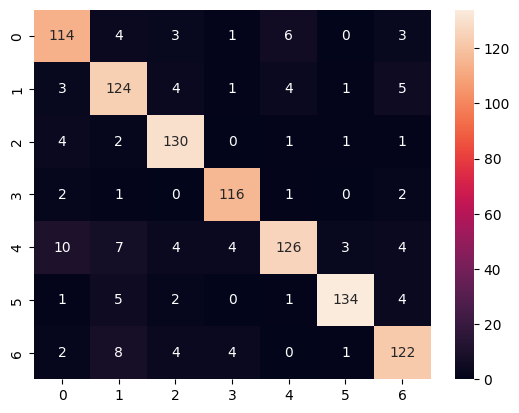

In [ ]:
# eXtreme Gradient Boosting (XGBoost)

from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
xgboostDogruluk=accuracy_score(y_test,y_pred)
print("xgboost doğruluk:", xgboostDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
# xgboost

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = xgboost, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanXGBOOST = accuracy.mean()*100
print('Accuracy', accMeanXGBOOST)


Accuracy 87.52551020408163


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.187876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128569
[LightGBM] [Info] Number of data points in the train set: 3920, number of used features: 4087
[LightGBM] [Info] Start training from score -1.929966
[LightGBM] [Info] Start training from score -1.949488
[LightGBM] [Info] Start training from score -1.944126
[LightGBM] [Info] Start training from score -1.914273
[LightGBM] [Info] Start training from score -1.978581
[LightGBM] [Info] Start training from score -1.958489
[LightGBM] [Info] Start training from score -1.947697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       131
           1       0.82      0.86      0.84       142
           2       0.87      0.93      0.90       139
           3       0.93      0.94     

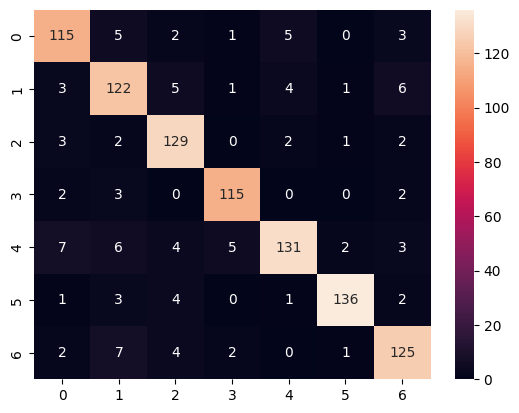

In [ ]:
# LightGBM

from lightgbm import LGBMClassifier
lightgbm = LGBMClassifier()
lightgbm.fit(X_train, y_train)

y_pred = lightgbm.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
lightgbmDogruluk=accuracy_score(y_test,y_pred)
print("LightGBM doğruluk:", lightgbmDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
# LightGBM

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = lightgbm, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanLGBM = accuracy.mean()*100
print('Accuracy', accMeanLGBM)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.177071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116382
[LightGBM] [Info] Number of data points in the train set: 3528, number of used features: 3841
[LightGBM] [Info] Start training from score -1.930162
[LightGBM] [Info] Start training from score -1.949886
[LightGBM] [Info] Start training from score -1.943928
[LightGBM] [Info] Start training from score -1.914658
[LightGBM] [Info] Start training from score -1.978171
[LightGBM] [Info] Start training from score -1.957886
[LightGBM] [Info] Start training from score -1.947896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.160836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, 

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.0 MB/s eta 0:00:00


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       131
           1       0.83      0.88      0.86       142
           2       0.84      0.92      0.88       139
           3       0.94      0.93      0.93       122
           4       0.91      0.82      0.86       158
           5       0.97      0.90      0.93       147
           6       0.85      0.85      0.85       141

    accuracy                           0.88       980
   macro avg       0.88      0.88      0.88       980
weighted avg       0.88      0.88      0.88       980

CatBoost doğruluk: 87.75510204081633
Precision değeri: 81.29496402877699
Recall değeri: 86.25954198473282
F1 Score değeri: 83.7037037037037
MAE değeri: 0.3826530612244898
MSE değeri: 1.4806122448979593
RMSE değeri: 1.2168041111444188


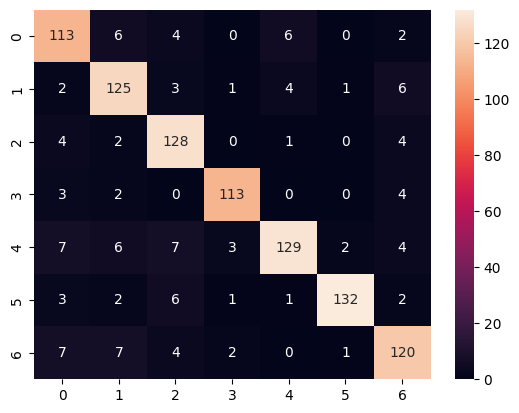

In [ ]:
# Category Boosting (CatBoost)

from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train, verbose=False)

y_pred = catboost.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
catboostDogruluk=accuracy_score(y_test,y_pred)
print("CatBoost doğruluk:", catboostDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
# CatBoost

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracyCatB = cross_val_score(estimator = catboost, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanCatB = accuracyCatB.mean()*100
print('Accuracy', accMeanCatB)


In [ ]:
# sonuçları almak uzun sürdüğü için tek seferde tüm sonuçları alamadığım için değerleri el ile girdim

logDogruluk = 90.71428571428571
dtDogruluk = 71.12244897959184
randomForestDogruluk = 87.14285714285714
dvmDogruluk = 91.02040816326532
knnDogruluk = 84.08163265306122
gnbDogruluk = 80.61224489795919
annDogruluk = 90.20408163265307
cartDogruluk = 71.3265306122449
gbmDogruluk = 87.04081632653062
xgboostDogruluk = 88.36734693877551
lightgbmDogruluk = 89.08163265306122
catboostDogruluk = 87.75510204081633

In [ ]:
modeller = pd.DataFrame({'Model':['Logistik Regresyon',
                                  'Karar Ağaçları',
                                  'Rastgele Orman',
                                  'Destek Vektör Makinesi',
                                  'K-en yakın komşu',
                                  'Gaussian NB',
                                   'ANN',
                                   'CART',
                                   'GBM',
                                   'XGBoost',
                                   'LightGBM',
                                   'CatBoost'
                                   ],
                        'Score':[ logDogruluk,dtDogruluk,randomForestDogruluk,dvmDogruluk,knnDogruluk,gnbDogruluk,annDogruluk,cartDogruluk,gbmDogruluk,xgboostDogruluk,lightgbmDogruluk,catboostDogruluk ] })

modeller

,Model,Score
0,Logistik Regresyon,90.714286
1,Karar Ağaçları,71.122449
2,Rastgele Orman,87.142857
3,Destek Vektör Makinesi,91.020408
4,K-en yakın komşu,84.081633
5,Gaussian NB,80.612245
6,ANN,90.204082
7,CART,71.326531
8,GBM,87.040816
9,XGBoost,88.367347


In [ ]:
model_sort = modeller.sort_values(by='Score',ascending=False)
model_sort

,Model,Score
3,Destek Vektör Makinesi,91.020408
0,Logistik Regresyon,90.714286
6,ANN,90.204082
10,LightGBM,89.081633
9,XGBoost,88.367347
11,CatBoost,87.755102
2,Rastgele Orman,87.142857
8,GBM,87.040816
4,K-en yakın komşu,84.081633
5,Gaussian NB,80.612245


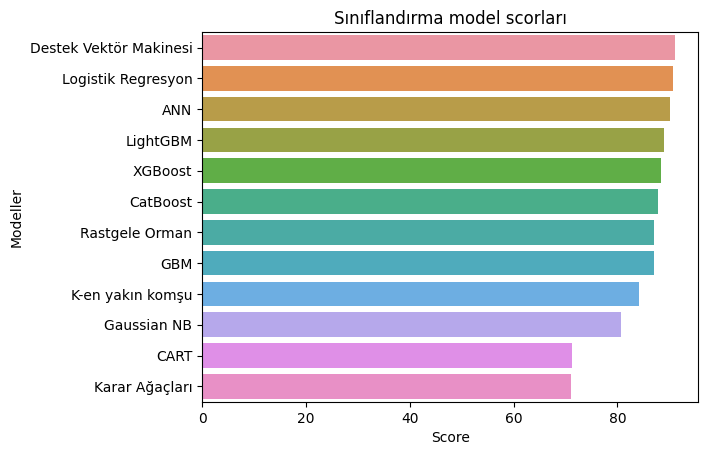

In [ ]:
sns.barplot( x = model_sort.Score , y=model_sort.Model )

plt.xlabel("Score")
plt.ylabel("Modeller")
plt.title("Sınıflandırma model scorları")
plt.show()

In [ ]:
# k-fold sonuçları
accMeanlogr = 89.66836734693878
accMeanDT = 72.14285714285714
accMeanRFC = 87.24489795918367
accMeanSVC = 90.12755102040816
accMeanKNN = 82.98469387755102
accMeanGNB = 80.17857142857142
accMeanANN = 90.43367346938774
accMeanCART = 71.27551020408164
accMeanGBM = 86.60714285714285
accMeanXGBOOST = 87.52551020408163
accMeanLGBM = 88.6734693877551
#accMeanCatB

In [ ]:
#k-fold sonuçları
modeller = pd.DataFrame({'Model':['Logistik Regresyon',
                                  'Karar Ağaçları',
                                  'Rastgele Orman',
                                  'Destek Vektör Makinesi',
                                  'K-en yakın komşu',
                                  'Gaussian NB',
                                   'ANN',
                                   'CART',
                                   'GBM',
                                   'XGBoost',
                                   'LightGBM',
                                 ],
                        'Score':[accMeanlogr,accMeanDT,accMeanRFC,accMeanSVC,accMeanKNN,accMeanGNB,accMeanANN,accMeanCART,accMeanGBM,accMeanXGBOOST,accMeanLGBM]})
modeller

,Model,Score
0,Logistik Regresyon,89.668367
1,Karar Ağaçları,72.142857
2,Rastgele Orman,87.244898
3,Destek Vektör Makinesi,90.127551
4,K-en yakın komşu,82.984694
5,Gaussian NB,80.178571
6,ANN,90.433673
7,CART,71.275510
8,GBM,86.607143
9,XGBoost,87.525510


In [ ]:
model_sort = modeller.sort_values(by='Score',ascending=False)
model_sort

,Model,Score
6,ANN,90.433673
3,Destek Vektör Makinesi,90.127551
0,Logistik Regresyon,89.668367
10,LightGBM,88.673469
9,XGBoost,87.525510
2,Rastgele Orman,87.244898
8,GBM,86.607143
4,K-en yakın komşu,82.984694
5,Gaussian NB,80.178571
1,Karar Ağaçları,72.142857


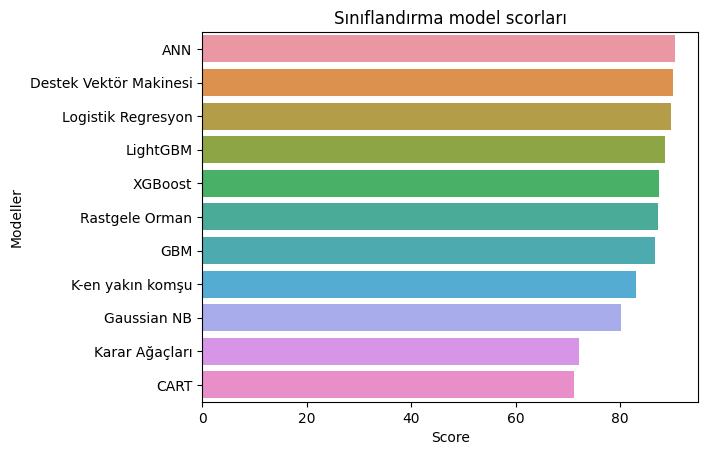

In [ ]:
sns.barplot( x= model_sort.Score , y=model_sort.Model )

plt.xlabel("Score")
plt.ylabel("Modeller")
plt.title("Sınıflandırma model scorları")
plt.show()

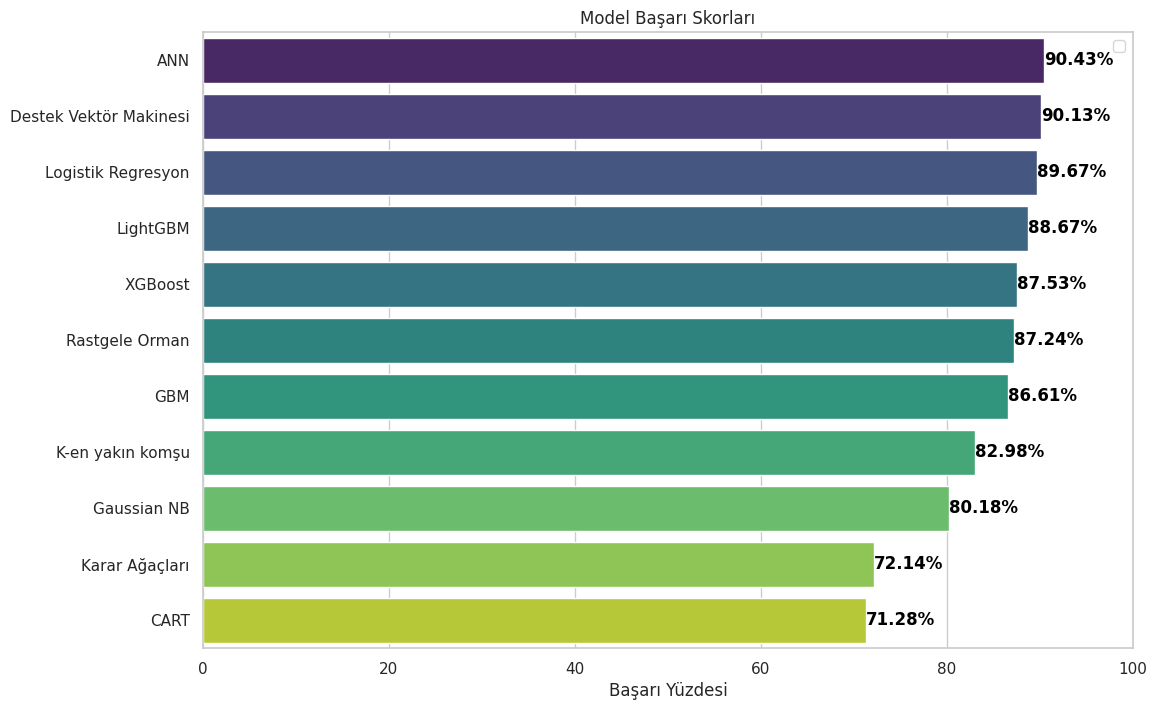

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ["ANN", "Destek Vektör Makinesi", "Logistik Regresyon", "LightGBM", "XGBoost", "Rastgele Orman", "GBM", "K-en yakın komşu", "Gaussian NB", "Karar Ağaçları", "CART"]
scores = [90.43, 90.13, 89.67, 88.67, 87.53, 87.24, 86.61, 82.98, 80.18, 72.14, 71.28]

# Set a color palette
custom_colors = sns.color_palette("viridis", len(models))

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=scores, y=models, palette=custom_colors)

# Display the percentage values on the bars
for index, value in enumerate(scores):
    bar_plot.text(value, index, f'{value:.2f}%', ha="left", va="center", color='black', fontweight='bold')

# Customize the plot
plt.xlabel('Başarı Yüzdesi')
plt.title('Model Başarı Skorları')
plt.xlim(0, 100)


# Add legend
plt.legend()

plt.show()

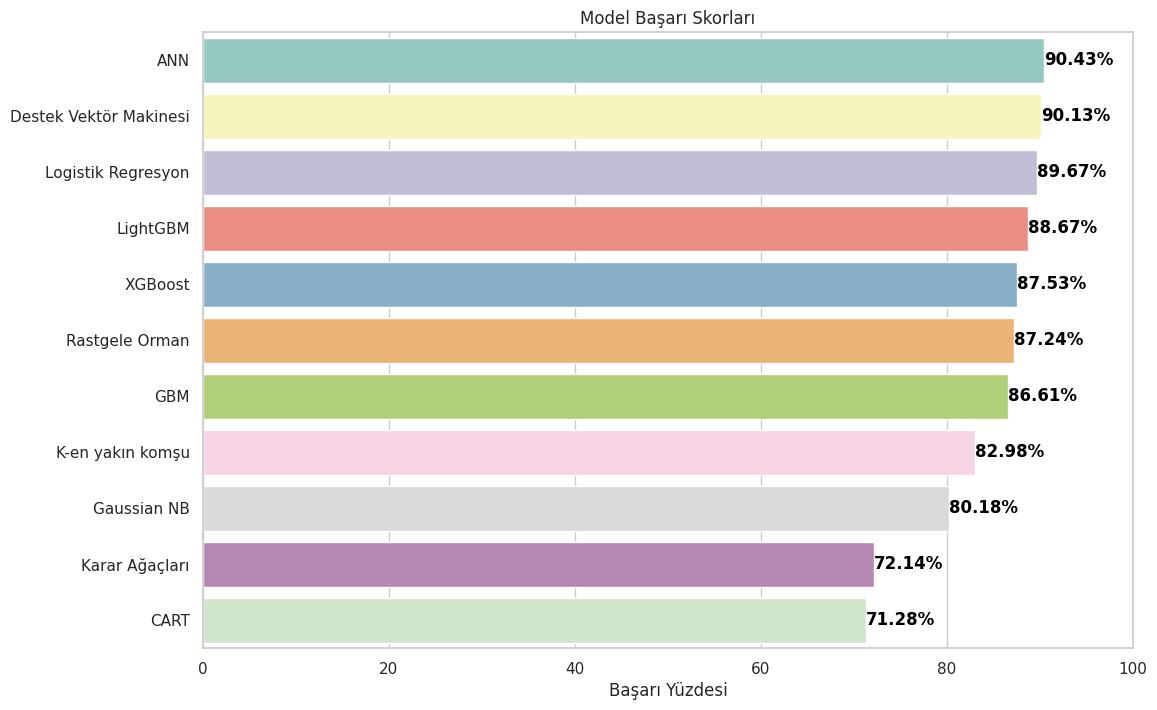

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ["ANN", "Destek Vektör Makinesi", "Logistik Regresyon", "LightGBM", "XGBoost", "Rastgele Orman", "GBM", "K-en yakın komşu", "Gaussian NB", "Karar Ağaçları", "CART"]
scores = [90.43, 90.13, 89.67, 88.67, 87.53, 87.24, 86.61, 82.98, 80.18, 72.14, 71.28]

# Set a different color palette
custom_colors = sns.color_palette("Set3", len(models))

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=scores, y=models, palette=custom_colors)

# Display the scores on the bars
for index, value in enumerate(scores):
    bar_plot.text(value, index, f'{value:.2f}%', ha="left", va="center", color='black', fontweight='bold')

# Customize the plot
plt.xlabel('Başarı Yüzdesi')
plt.title('Model Başarı Skorları')
plt.xlim(0, 100)

# Show the plot
plt.show()